## Rain prediction in Australia

#### Import required libraries

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report

<br>
<br>
<br>
<br>
<br>

#### Read dataset

In [164]:
dataframe_clean_2 = pd.read_csv(r"C:\Users\Lucio\Documents\Github\Next-day-rain-prediction\1- Data\2- Processed\dataframe_clean_2.csv", index_col=0)
dataframe_clean_2.head()

Location  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     22.9       0.6           W           44.0          W   
1   Albury     25.1       0.0         WNW           44.0        NNW   
2   Albury     25.7       0.0         WSW           46.0          W   
3   Albury     28.0       0.0          NE           24.0         SE   
4   Albury     32.3       1.0           W           41.0        ENE   

  WindDir3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp3pm  \
0        WNW         71.0         22.0       1007.7       1007.1     21.8   
1        WSW         44.0         25.0       1010.6       1007.8     24.3   
2        WSW         38.0         30.0       1007.6       1008.7     23.2   
3          E         45.0         16.0       1017.6       1012.8     26.5   
4         NW         82.0         33.0       1010.8       1006.0     29.7   

   RainToday  RainTomorrow  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

dataframe_clean_2 characteristics:
- Drop irrelevant columns (correlation with target variable <0.1)

### 1- Outliers
### 2- Collinearity

<br>
<br>
<br>
<br>
<br>

#### Getting numerical and categorical columns

In [165]:
def get_num_cat_columns(dataframe):
    categorical_cols=dataframe.select_dtypes(include="object").columns
    numerical_cols=dataframe.select_dtypes(exclude="object").columns
    '''
    This function saves numerical and categorical columns in 2 different dataframes
    '''
    return categorical_cols, numerical_cols

In [166]:
categorical_cols, numerical_cols= get_num_cat_columns(dataframe_clean_2)

### 1- Outliers

#### Univariate Analysis

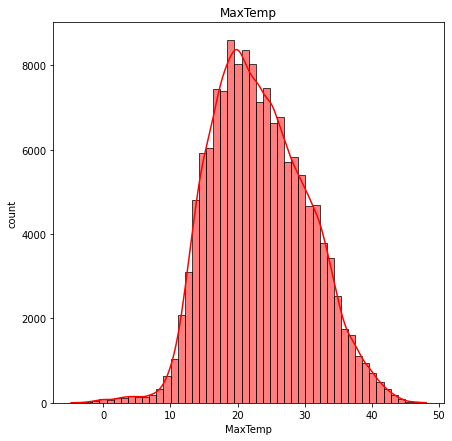

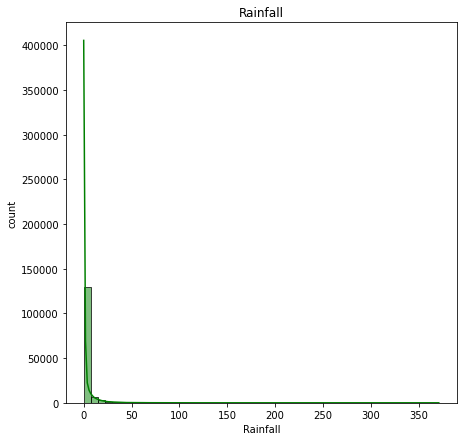

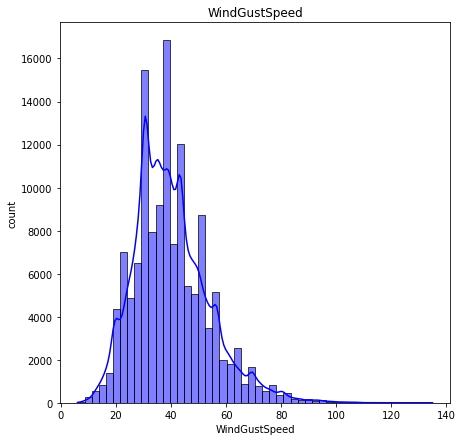

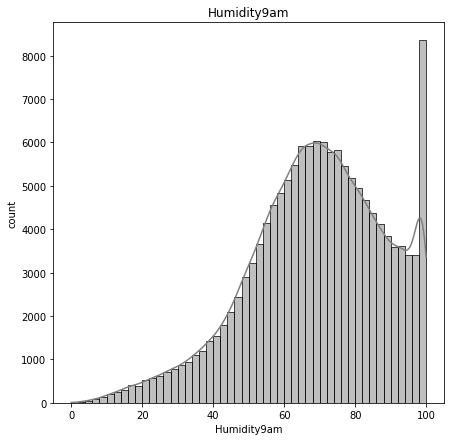

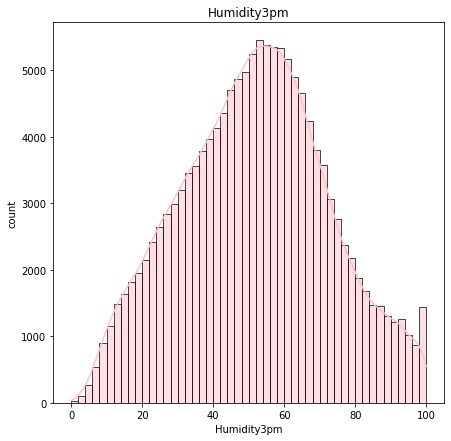

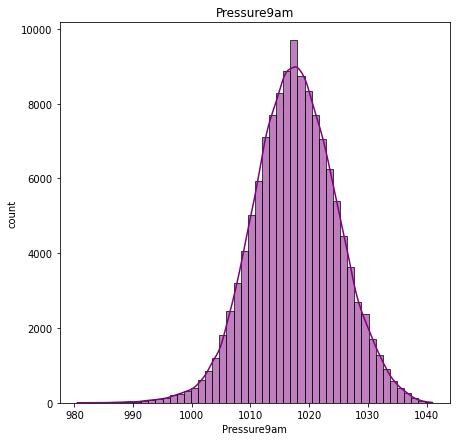

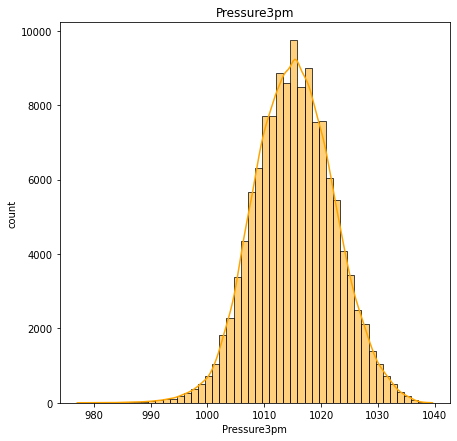

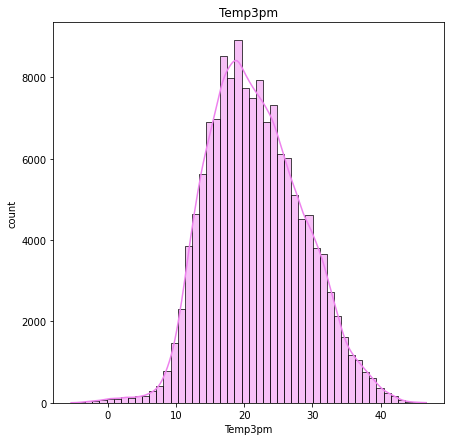

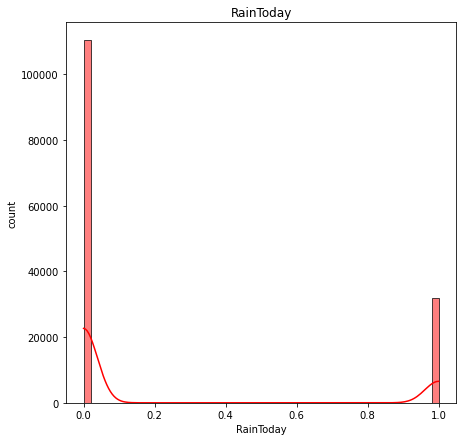

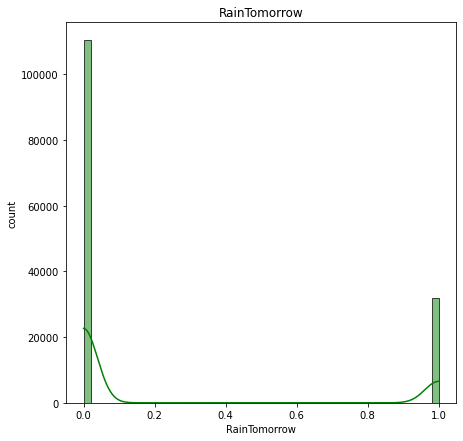

In [167]:
colors_list=["red","green","blue","grey","pink", "purple","orange","violet","red","green","blue","grey","pink", "purple","orange","violet"]
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(dataframe_clean_2[numerical_cols[i]], color=colors_list[i], kde=True, bins=50)
    label=numerical_cols[i]
    plt.xlabel(numerical_cols[i])
    plt.ylabel("count")
    plt.title(label)

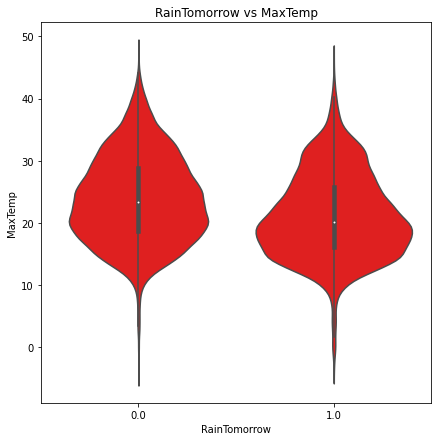

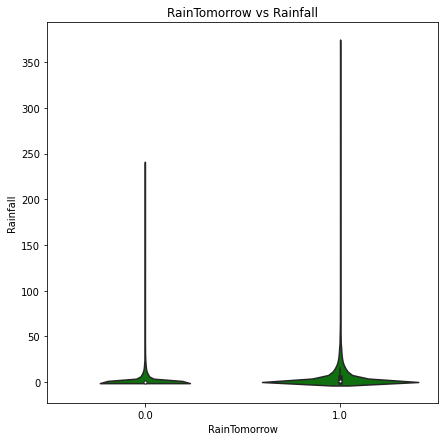

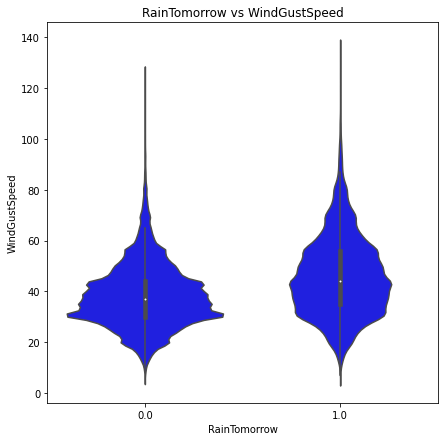

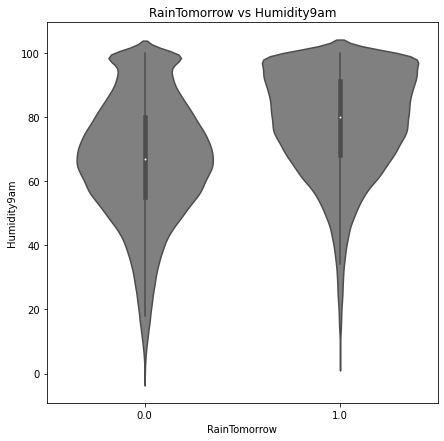

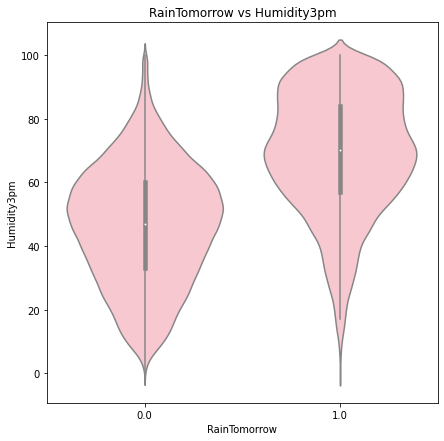

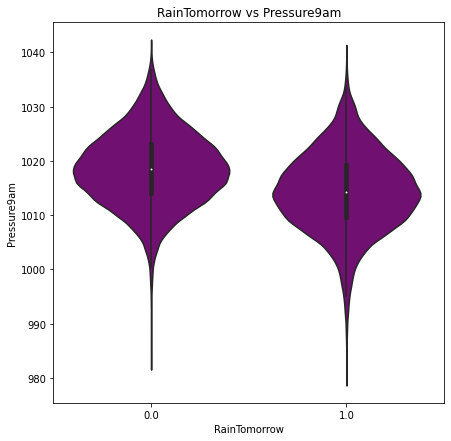

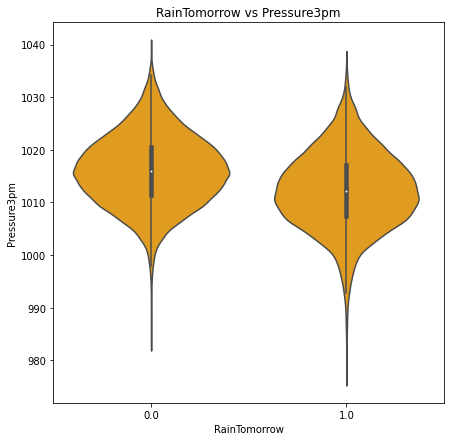

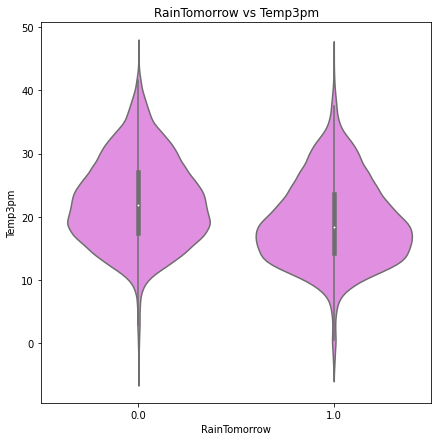

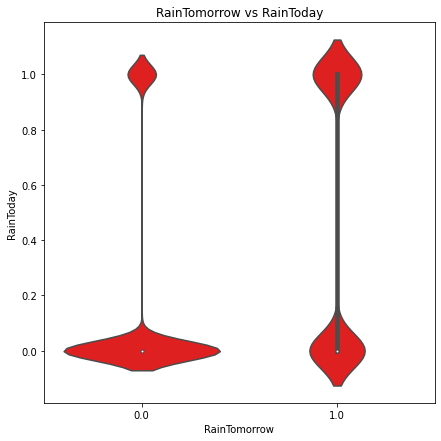

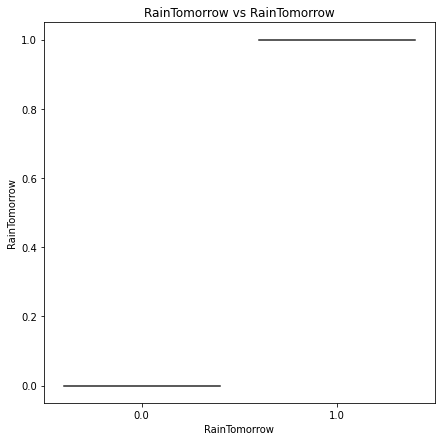

In [168]:
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.violinplot(data=dataframe_clean_2, x=dataframe_clean_2['RainTomorrow'], y=dataframe_clean_2[numerical_cols[i]], hue=None ,color=colors_list[i])
    plt.title(f"RainTomorrow vs {numerical_cols[i]}")

#### Drop large outliers

In [169]:
Q1 = dataframe_clean_2.quantile(0.01)
Q3 = dataframe_clean_2.quantile(0.992)
IQR = Q3 - Q1
LOWER_BOUND = Q1 - 1.5*IQR # 1.5 is a standard value
UPPER_BOUND = Q3 + 1.5*IQR
IQR_outliers = dataframe_clean_2[((dataframe_clean_2 < LOWER_BOUND) | (dataframe_clean_2 > UPPER_BOUND)).any(axis=1)]
IQR_outliers

C:\Users\Lucio\AppData\Local\Temp\ipykernel_6404\770402629.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  IQR_outliers = dataframe_clean_2[((dataframe_clean_2 < LOWER_BOUND) | (dataframe_clean_2 > UPPER_BOUND)).any(axis=1)]


Location  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
4468    BadgerysCreek     28.1     116.0         WSW           37.0   
5664    BadgerysCreek     17.7     109.2         WSW           57.0   
9105     CoffsHarbour     27.1     189.0           E           54.0   
9357     CoffsHarbour     21.0     141.8         NaN            NaN   
9368     CoffsHarbour     23.1     371.0         NaN            NaN   
...               ...      ...       ...         ...            ...   
142129         Darwin     30.4     109.8         WSW           46.0   
142151         Darwin     28.4     145.6           W           52.0   
142163         Darwin     28.4     210.6         WNW           67.0   
142331      Katherine     33.8     117.6         ESE           35.0   
143335      Katherine     26.5     167.0           W           52.0   

       WindDir9am WindDir3pm  Humidity9am  Humidity3pm  Pressure9am  \
4468            W          E         89.0         75.0       1001.5   
5664            W        WSW         59.0         51.0       1000.4   
9105           SW         SW         98.0         64.0       1008.2   
9357            E        ENE         78.0         82.0       1023.7   
9368           SW          S         93.0         81.0       1026.6   
...           ...        ...          ...          ...          ...   
142129          S          W         98.0         75.0       1002.0   
142151          W        WSW         96.0         89.0       1008.2   
142163        NNW        WNW         93.0         85.0       1002.5   
142331          E        ESE         98.0         98.0       1006.4   
143335        WSW         SW         91.0          NaN       1003.6   

        Pressure3pm  Temp3pm  RainToday  RainTomorrow  
4468         1004.4     24.9        1.0           0.0  
5664          998.9     16.9        1.0           0.0  
9105         1007.6     26.5        1.0           1.0  
9357         1023.9     20.1        1.0           1.0  
9368         1025.9     22.0        1.0           1.0  
...             ...      ...        ...           ...  
142129        999.9     28.9        1.0           1.0  
142151       1005.2     25.5        1.0           1.0  
142163        999.9     27.4        1.0           1.0  
142331       1003.1     25.4        1.0           1.0  
143335       1002.9      NaN        1.0           1.0  

[130 rows x 14 columns]

In [170]:
dataframe_clean_wo_outliers = dataframe_clean_2.drop(IQR_outliers.index)
dataframe_clean_wo_outliers

Location  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0        Albury     22.9       0.6           W           44.0          W   
1        Albury     25.1       0.0         WNW           44.0        NNW   
2        Albury     25.7       0.0         WSW           46.0          W   
3        Albury     28.0       0.0          NE           24.0         SE   
4        Albury     32.3       1.0           W           41.0        ENE   
...         ...      ...       ...         ...            ...        ...   
145455    Uluru     23.4       0.0           E           31.0         SE   
145456    Uluru     25.3       0.0         NNW           22.0         SE   
145457    Uluru     26.9       0.0           N           37.0         SE   
145458    Uluru     27.0       0.0          SE           28.0        SSE   
145459    Uluru      NaN       0.0         NaN            NaN        ESE   

       WindDir3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             WNW         71.0         22.0       1007.7       1007.1   
1             WSW         44.0         25.0       1010.6       1007.8   
2             WSW         38.0         30.0       1007.6       1008.7   
3               E         45.0         16.0       1017.6       1012.8   
4              NW         82.0         33.0       1010.8       1006.0   
...           ...          ...          ...          ...          ...   
145455        ENE         51.0         24.0       1024.6       1020.3   
145456          N         56.0         21.0       1023.5       1019.1   
145457        WNW         53.0         24.0       1021.0       1016.8   
145458          N         51.0         24.0       1019.4       1016.5   
145459        ESE         62.0         36.0       1020.2       1017.9   

        Temp3pm  RainToday  RainTomorrow  
0          21.8        0.0           0.0  
1          24.3        0.0           0.0  
2          23.2        0.0           0.0  
3          26.5        0.0           0.0  
4          29.7        0.0           0.0  
...         ...        ...           ...  
145455     22.4        0.0           0.0  
145456     24.5        0.0           0.0  
145457     26.1        0.0           0.0  
145458     26.0        0.0           0.0  
145459     20.9        0.0           NaN  

[145330 rows x 14 columns]

<br>
<br>
<br>
<br>
<br>

### 1- Collinearity

#### Replace NaN values

In [171]:
def percentage_nan(data: pd.DataFrame):
    """
    This function calculates the percentage 
    of NaN values within all of the columns 
    of a dataframe.
    """
    
    columns = list(data.columns)
    percentages = {col:0 for col in columns}
    
    for col in columns:
        percentages[col] = round(100*data[col].isna().sum()/len(data.index), 2)
    
    return percentages

In [172]:
missing_vals_percentages = percentage_nan(dataframe_clean_wo_outliers)
missing_vals_percentages

{'Location': 0.0,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'WindGustDir': 7.1,
 'WindGustSpeed': 7.06,
 'WindDir9am': 7.27,
 'WindDir3pm': 2.91,
 'Humidity9am': 1.83,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.34,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 2.25}

In [173]:
#First replace NaN with median (numerical columns)
imputer= SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)
for col in numerical_cols:
    dataframe_clean_wo_outliers[col]= imputer.fit_transform(dataframe_clean_wo_outliers[[col]])

In [174]:
#First replace NaN with mode (categorical columns)
dataframe_clean_wo_outliers['WindGustDir']=dataframe_clean_wo_outliers['WindGustDir'].fillna(dataframe_clean_wo_outliers['WindGustDir'].mode()[0])
dataframe_clean_wo_outliers['WindDir9am']=dataframe_clean_wo_outliers['WindDir9am'].fillna(dataframe_clean_wo_outliers['WindDir9am'].mode()[0])
dataframe_clean_wo_outliers['WindDir3pm']=dataframe_clean_wo_outliers['WindDir3pm'].fillna(dataframe_clean_wo_outliers['WindDir3pm'].mode()[0])

<br>
<br>
<br>
<br>
<br>

#### Check collinearity

In [175]:
#sns.pairplot(dataframe_clean_wo_outliers, hue='RainTomorrow')
#plt.show()

In [176]:
def calculate_vif(df: pd.DataFrame, cols: list):
    """
    This function calculates the VIF
    for a set of columns, given a dataframe. 
    """
    
    X = df[cols]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif = vif[vif["variable"]!='intercept']
    
    return vif

In [177]:
numeric_vars = dataframe_clean_wo_outliers._get_numeric_data()

In [178]:
calculate_vif(dataframe_clean_wo_outliers, numeric_vars.columns).sort_values('VIF', ascending=False)

C:\Users\Lucio\AppData\Local\Temp\ipykernel_6404\1440755858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


variable        VIF
7        Temp3pm  19.124605
0        MaxTemp  18.276128
6    Pressure3pm  15.711899
5    Pressure9am  15.520441
4    Humidity3pm   2.597227
3    Humidity9am   2.155659
8      RainToday   1.722528
1       Rainfall   1.507394
9   RainTomorrow   1.400007
2  WindGustSpeed   1.381158

In [179]:
calculate_vif(dataframe_clean_wo_outliers, numeric_vars.drop(columns=['Temp3pm','Pressure3pm','MaxTemp']).columns).sort_values('VIF', ascending=False)

C:\Users\Lucio\AppData\Local\Temp\ipykernel_6404\1440755858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


variable       VIF
3    Humidity3pm  2.075969
2    Humidity9am  2.007209
5      RainToday  1.664293
0       Rainfall  1.496397
6   RainTomorrow  1.373452
1  WindGustSpeed  1.331964
4    Pressure9am  1.292887

In [180]:
dataframe_clean_wo_outl_wo_corr = dataframe_clean_wo_outliers.drop(columns=['Temp3pm','Pressure3pm','MaxTemp'])
dataframe_clean_wo_outl_wo_corr.head()

Location  Rainfall WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0   Albury       0.6           W           44.0          W        WNW   
1   Albury       0.0         WNW           44.0        NNW        WSW   
2   Albury       0.0         WSW           46.0          W        WSW   
3   Albury       0.0          NE           24.0         SE          E   
4   Albury       1.0           W           41.0        ENE         NW   

   Humidity9am  Humidity3pm  Pressure9am  RainToday  RainTomorrow  
0         71.0         22.0       1007.7        0.0           0.0  
1         44.0         25.0       1010.6        0.0           0.0  
2         38.0         30.0       1007.6        0.0           0.0  
3         45.0         16.0       1017.6        0.0           0.0  
4         82.0         33.0       1010.8        0.0           0.0

In [181]:
correlations = dataframe_clean_wo_outl_wo_corr.corr()

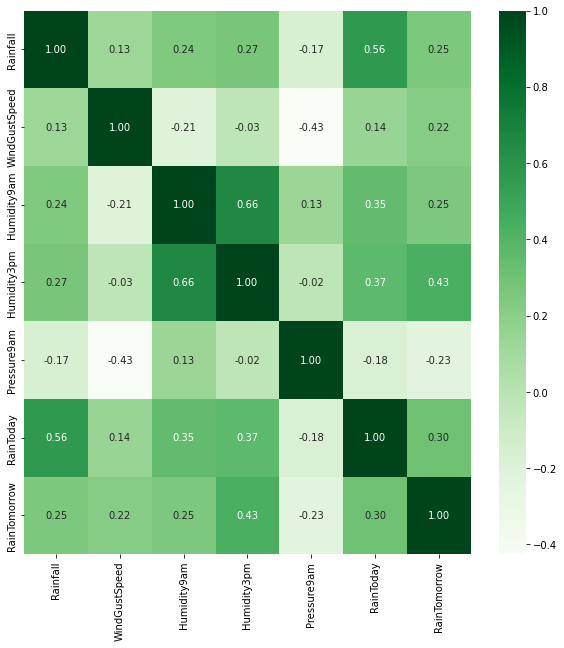

In [182]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, cmap="Greens", fmt=".2f")
plt.show()

<br>
<br>
<br>
<br>
<br>

#### Save cleaned dataframed to csv file

In [183]:
dataframe_clean_wo_outl_wo_corr.to_csv(r"C:\Users\Lucio\Documents\Github\Next-day-rain-prediction\1- Data\2- Processed\dataframe_clean_wo_outl_wo_corr.csv")

dataframe_clean_wo_outl_wo_corr characteristics:
- Removed univariated outliers
- Removed variables with high collinearity